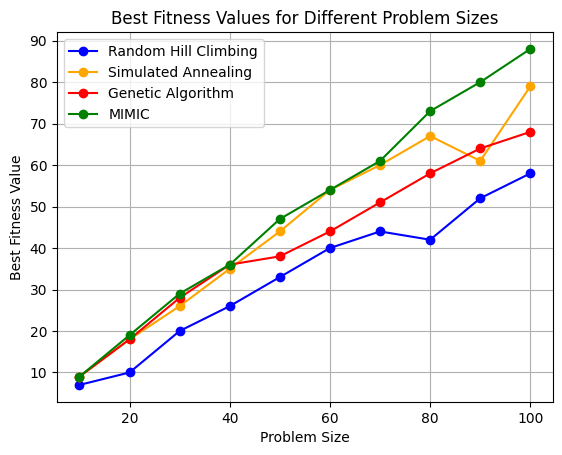

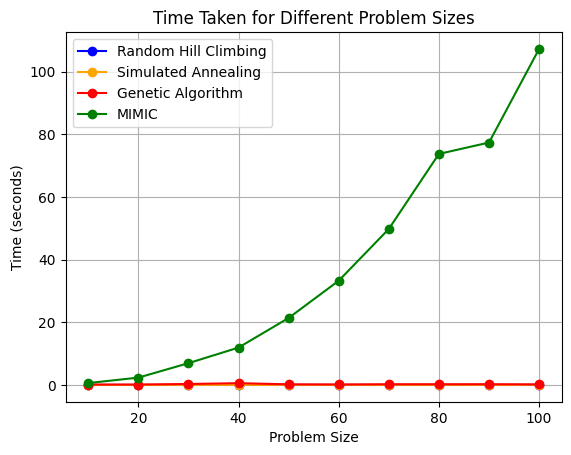

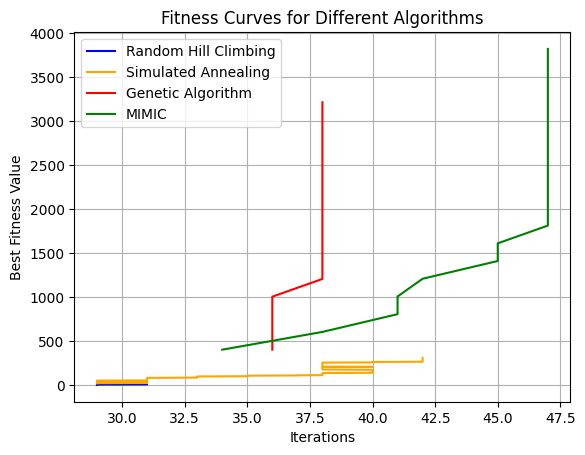

In [1]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the Flip-Flop fitness function
fitness = mlrose.FlipFlop()

# Function to initialize problem
def initialize(problem_length):
    init_state = np.random.randint(2, size=problem_length)
    return problem_length, init_state

# Function to run optimization algorithms on a given problem
def run_optimizations(problem_length, state):
    problem_length, init_state_var = initialize(problem_length)
    problem = mlrose.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True, max_val=2)
    
    # Random Hill Climbing
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem,
                                                                                  max_attempts=10, 
                                                                                  max_iters=1000, 
                                                                                  restarts=0, 
                                                                                  init_state=init_state_var, 
                                                                                  curve=True, 
                                                                                  random_state=state)
    rhc_time = time.time() - start_time
    
    # Simulated Annealing
    start_time = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem,
                                                                                  schedule=mlrose.ExpDecay(),
                                                                                  max_attempts=10, 
                                                                                  max_iters=1000, 
                                                                                  init_state=init_state_var, 
                                                                                  curve=True, 
                                                                                  random_state=state)
    sa_time = time.time() - start_time
    
    # Genetic Algorithm
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem, 
                                                                          pop_size=200, 
                                                                          mutation_prob=0.1, 
                                                                          max_attempts=10, 
                                                                          max_iters=1000, 
                                                                          curve=True, 
                                                                          random_state=state)
    ga_time = time.time() - start_time
    
    # MIMIC
    start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem,
                                                                             pop_size=200,
                                                                             keep_pct=0.2,
                                                                             max_attempts=10,
                                                                             max_iters=1000,
                                                                             curve=True,
                                                                             random_state=state)
    mimic_time = time.time() - start_time
    
    return (rhc_best_state, sa_best_state, ga_best_state, mimic_best_state,
            rhc_best_fitness, sa_best_fitness, ga_best_fitness, mimic_best_fitness,
            rhc_fitness_curve, sa_fitness_curve, ga_fitness_curve, mimic_fitness_curve,
            rhc_time, sa_time, ga_time, mimic_time)

# Define different problem sizes
problem_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
rhc_best_fitness_values = []
sa_best_fitness_values = []
ga_best_fitness_values = []
mimic_best_fitness_values = []
rhc_times = []
sa_times = []
ga_times = []
mimic_times = []

for size in problem_sizes:
    results = run_optimizations(size, 42)
    (rhc_best_state, sa_best_state, ga_best_state, mimic_best_state,
     rhc_best_fitness, sa_best_fitness, ga_best_fitness, mimic_best_fitness,
     rhc_fitness_curve, sa_fitness_curve, ga_fitness_curve, mimic_fitness_curve,
     rhc_time, sa_time, ga_time, mimic_time) = results
    
    rhc_best_fitness_values.append(rhc_best_fitness)
    sa_best_fitness_values.append(sa_best_fitness)
    ga_best_fitness_values.append(ga_best_fitness)
    mimic_best_fitness_values.append(mimic_best_fitness)
    rhc_times.append(rhc_time)
    sa_times.append(sa_time)
    ga_times.append(ga_time)
    mimic_times.append(mimic_time)

# Plotting the best fitness values for different problem sizes
plt.figure()

plt.plot(problem_sizes, rhc_best_fitness_values, label='Random Hill Climbing', marker='o', color='blue')
plt.plot(problem_sizes, sa_best_fitness_values, label='Simulated Annealing', marker='o', color='orange')
plt.plot(problem_sizes, ga_best_fitness_values, label='Genetic Algorithm', marker='o', color='red')
plt.plot(problem_sizes, mimic_best_fitness_values, label='MIMIC', marker='o', color='green')

# Adding title and labels
plt.title('Best Fitness Values for Different Problem Sizes')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness Value')
# Adding legend
plt.legend()
# Adding grid
plt.grid()
# Show the plot
plt.show()

# Plotting the time taken for different problem sizes
plt.figure()

plt.plot(problem_sizes, rhc_times, label='Random Hill Climbing', marker='o', color='blue')
plt.plot(problem_sizes, sa_times, label='Simulated Annealing', marker='o', color='orange')
plt.plot(problem_sizes, ga_times, label='Genetic Algorithm', marker='o', color='red')
plt.plot(problem_sizes, mimic_times, label='MIMIC', marker='o', color='green')

# Adding title and labels
plt.title('Time Taken for Different Problem Sizes')
plt.xlabel('Problem Size')
plt.ylabel('Time (seconds)')
# Adding legend
plt.legend()
# Adding grid
plt.grid()
# Show the plot
plt.show()

# Plotting the fitness curves for each algorithm for a problem size
problem_length = 50
results = run_optimizations(problem_length, 42)
(rhc_best_state, sa_best_state, ga_best_state, mimic_best_state,
 rhc_best_fitness, sa_best_fitness, ga_best_fitness, mimic_best_fitness,
 rhc_fitness_curve, sa_fitness_curve, ga_fitness_curve, mimic_fitness_curve,
 rhc_time, sa_time, ga_time, mimic_time) = results

plt.figure()

plt.plot(rhc_fitness_curve[:, 0], rhc_fitness_curve[:, 1], label='Random Hill Climbing', color='blue')
plt.plot(sa_fitness_curve[:, 0], sa_fitness_curve[:, 1], label='Simulated Annealing', color='orange')
plt.plot(ga_fitness_curve[:, 0], ga_fitness_curve[:, 1], label='Genetic Algorithm', color='red')
plt.plot(mimic_fitness_curve[:, 0], mimic_fitness_curve[:, 1], label='MIMIC', color='green')

# Adding title and labels
plt.title('Fitness Curves for Different Algorithms')
plt.xlabel('Iterations')
plt.ylabel('Best Fitness Value')

# Adding legend
plt.legend()

# Adding grid
plt.grid()

# Show the plot
plt.show()
